In [30]:
import cv2
img = cv2.imread('./image/image0.jpg')                    # 讀取街道影像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 轉換成黑白影像

car = cv2.CascadeClassifier("haarcascade_fullbody.xml")    # 讀取人體模型
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 5)                  # 模糊化去除雜訊
cars = car.detectMultiScale(gray, 1.1, 3, minSize=(30, 30))       # 偵測行人
for (x, y, w, h) in cars:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)   # 繪製外框

cv2.imshow('oxxostudio', img)
cv2.waitKey(0)     # 按下任意鍵停止
cv2.destroyAllWindows()

In [51]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
# 加載圖像
image = cv2.imread('./image/image0.jpg')
# img = cv2.imread('./image/image4.jpg')

# 偵測照片中有幾個行人
def detect(image):
    # 加載行人檢測器
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # 執行行人檢測
    (rects, _) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)
    # 繪製檢測結果
    # for (x, y, w, h) in rects:
    #     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2, cv2.LINE_AA)
    # # 顯示結果
    # cv2.imshow("People Detection", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return rects.shape[0]


print(detect(image))
# rects = np.array([[x, y, x+w, y+h] for (x, y, w, h) in rects])
# pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
# for (xA, yA, xB, yB) in pick:
#     cv2.rectangle(img, (xA, yA), (xB, yB), (0, 0, 255), 2, cv2.LINE_AA)


5


In [17]:
import cv2
from imutils.object_detection import non_max_suppression
import numpy as np

img=cv2.imread("image4.jpg")
orig = img.copy()
# 定义HOG对象，采用默认参数，或者按照下面的格式自己设置
defaultHog=cv2.HOGDescriptor()

# 设置SVM分类器，用默认分类器
defaultHog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 对图像进行多尺度行人检测，返回结果为矩形框
# people=defaultHog.detectMultiScale(img, 0,(8,8),(32,32),1.05,2)

# detect people in the image
(rects, weights) = defaultHog.detectMultiScale(img, winStride=(4, 4),
     padding=(8, 8), scale=1.05)

# 画长方形，框出行人
# for i in range(len(people)):
#     r=people[0][i]
#     cv2.rectangle(img,(r[0],r[1]),(r[2],r[3]),(0,255,0),2,cv2.LINE_AA)

for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 2)

cv2.imshow("Before NMS", orig)
cv2.imshow("After NMS", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# # 偵測照片中有幾個行人
# def detect(stop_id):
#   # 加載圖像
#   # stop_id = BusStop.get_stop_id()
#   image = cv2.imread('./image/busStop' + stop_id + '.jpg')
#   # img = cv2.imread('./image/image4.jpg')
#   # 加載行人檢測器
#   hog = cv2.HOGDescriptor()
#   hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

#   # 執行行人檢測
#   (rects, _) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)
#   # 繪製檢測結果
#   # for (x, y, w, h) in rects:
#   #     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2, cv2.LINE_AA)
#   # # 顯示結果
#   # cv2.imshow("People Detection", image)
#   # cv2.waitKey(0)
#   # cv2.destroyAllWindows()

#   # rects = np.array([[x, y, x+w, y+h] for (x, y, w, h) in rects])
#   # pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
#   # for (xA, yA, xB, yB) in pick:
#   #     cv2.rectangle(img, (xA, yA), (xB, yB), (0, 0, 255), 2, cv2.LINE_AA)
#   return rects.shape[0]

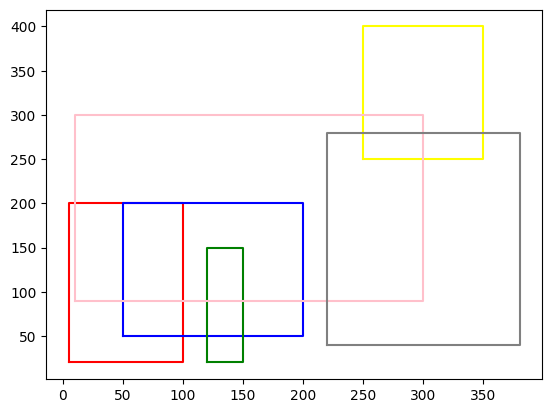

[2 1 3 5]


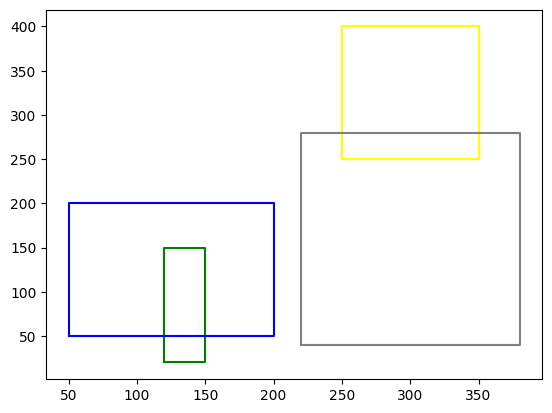

In [16]:
import numpy as np
# import cv2
import matplotlib.pyplot as plt


det_result=np.array([[20,5,200,100,0.353],
            [50,50,200,200,0.624],
            [20,120,150,150,0.667],
            [250,250,400,350,0.5],
            [90,10,300,300,0.3],
            [40,220,280,380,0.46]])
colors=['red','blue','green','yellow','pink','gray']
# plt.figure()




def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    # x1、y1、x2、y2、以及score赋值
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    # 每一个检测框的面积
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    # 按照score置信度降序排序
    order = scores.argsort()[::-1]

    pick = []  # 保留的结果框集合
    while order.size > 0:
        i = order[0]
        pick.append(i)  # 保留该类剩余box中得分最高的一个
        # 得到相交区域,左上及右下
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        # 计算相交的面积,不重叠时面积为0
        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        # 计算IoU：重叠面积 /（面积1+面积2-重叠面积）
        ovr = inter / (areas[i] + areas[order[1:]] - inter)
        # 保留IoU小于阈值的box
        inds = np.where(ovr <= thresh)[0]
        order = order[inds + 1]  # 因为ovr数组的长度比order数组少一个,所以这里要将所有下标后移一位

    return pick


def non_max_suppression(dets, threshold):
    """执行non-maximum suppression并返回保留的boxes的索引.
    dets:(x1、y1、x2、y2,scores)
    threshold: Float型. 用于过滤IoU的阈值.
    """
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    # 每一个检测框的面积
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # 获取根据分数排序的boxes的索引(最高的排在对前面)
    ixs = scores.argsort()[::-1]

    pick = []
    while len(ixs) > 0:
        # 选择排在最前的box，并将其索引加到列表中
        i = ixs[0]
        pick.append(i)
        # 计算选择的box与剩下的box的IoU

        xx1 = np.maximum(x1[i], x1[ixs[1:]])
        yy1 = np.maximum(y1[i], y1[ixs[1:]])
        xx2 = np.minimum(x2[i], x2[ixs[1:]])
        yy2 = np.minimum(y2[i], y2[ixs[1:]])

        # 计算相交的面积,不重叠时面积为0
        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        # 计算IoU：重叠面积 /（面积1+面积2-重叠面积）
        ovr = inter / (areas[i] + areas[ixs[1:]] - inter)

        remove_ixs = np.where(ovr > threshold)[0] + 1
        # 将选择的box和重叠的boxes的索引删除.
        ixs = np.delete(ixs, remove_ixs)
        ixs = np.delete(ixs, 0)
    return np.array(pick)



if __name__=='__main__':
    for i in range(len(det_result)):
        # plt.gca().add_patch(plt.Rectangle(xy=(det_result[i][1], det_result[i][0]),
        #                               width=det_result[i][3] - det_result[i][1],
        #                               height=det_result[i][2] - det_result[i][0],
        #                               edgecolor='green',
        #                               fill=False, linewidth=2))
        plt.plot([det_result[i][1], det_result[i][3], det_result[i][3], det_result[i][1],
                  det_result[i][1]],  # col
                 [det_result[i][0], det_result[i][0], det_result[i][2], det_result[i][2],
                  det_result[i][0]],  # row
                 color=colors[i], marker='.', ms=0)
    plt.show()

    # result=py_cpu_nms(det_result,0.1)
    result=non_max_suppression(det_result,0.2)
    print(result)
    for j in range(len(result)):
        # plt.gca().add_patch(plt.Rectangle(xy=(det_result[i][1], det_result[i][0]),
        #                               width=det_result[i][3] - det_result[i][1],
        #                               height=det_result[i][2] - det_result[i][0],
        #                               edgecolor='green',
        #                               fill=False, linewidth=2))
        i = result[j]
        plt.plot([det_result[i][1], det_result[i][3], det_result[i][3], det_result[i][1],
                  det_result[i][1]],  # col
                 [det_result[i][0], det_result[i][0], det_result[i][2], det_result[i][2],
                  det_result[i][0]],  # row
                 color=colors[i], marker='.', ms=0)
    plt.show()